<a href="https://colab.research.google.com/github/Russel-hunho/DeepLearning/blob/main/pytorch_Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://wikidocs.net/59425

**다중 클래스 분류**
> 3개 이상의 선택지로부터 1개를 선택하는 문제

**소프트맥스(Softmax Regression) 회귀**:
> 다중 클래스 분류 문제를 풀기 위한 알고리즘 중 하나

# 0. 원-핫 인코딩(One-hot Encoding)

원-핫 인코딩: 범주형 데이터의 레이블을 표현하는 방법

* 선택하야 하는 선택지의 개수만큼의 차원을 가짐
* 각 선택지의 인덱스에 해당하는 원소는 1, 나머지는 0 값을 부여
> ex) 3개 선택지: A = [1,0,0]. B = [0,1,0], C = [0,0,1]
* 이때, 값을 부여한 벡터 (A,B,C)들을 **원-핫 벡터(one-hot vector)** 라고 한다!
* 장점(필요성): **"관계의 무작위성" 부여**

# 1. 소프트맥스 회귀 이해
다중 클래스 분류(Multi-class Classification)

X -> Z -> P(예측 벡터) -> Y(결과값, 원-핫 벡터 형식)

* [Step1] 입력 X = [x1,x2,...]를, Softmax함수의 입력 Z로 바꾼다!
> Z: 답(Y)와 크기가 동일해야함!

* [Step2] input Z를 softmax 함수를 적용하여 P 구하기
> P: 각 답이 나올 확률벡터; 원소의 총 합 = 1

* [step3] P ~ Y간 오차 계산을 통한, softmax 가중치 수정
> 적절한 Cost Function: **크로스 엔트로피 함수** 사용!
>> cost(W) = - Σ[ (yᵢ)*log(pᵢ) ]
>>> 로지스틱(이진분류)에선, y1 = y, y2 = (1-y) 였던 것




# 2.소프트맥스 회귀 비용함수 구현

###2.1. 로우레벨 구현:
* F.Softmax 함수 이용 Softmax 적용
* torch.log 함수 이용 Cost Function 계산

In [1]:
import torch
import torch.nn.functional as F

In [2]:
z = torch.FloatTensor([1,2,3])

In [3]:
torch.manual_seed(1)
hypothesis = F.softmax(z, dim = 0) # 첫번째 차원에 소프트맥스 함수를 적용한다는 의미)
print(hypothesis) # P 벡터
print(hypothesis.sum()) # 합은 1이다!

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [4]:
''' 연습 data '''

torch.manual_seed(1)
z = torch.rand(3,5,requires_grad = True) # 3x5 크기의 input, 0~1 사이 random 값
print(z)
print()

''' P값 계산 w/ softmax 함수 '''

hypothesis = F.softmax(z, dim = 1)
  # 두번째 차원에 소프트맥스 함수 적용)
  # 각 샘플(5개 data)에 대해 적용
print(hypothesis)

for i in range(3):
  print(hypothesis[i].sum())

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)
tensor(1., grad_fn=<SumBackward0>)
tensor(1., grad_fn=<SumBackward0>)


In [5]:
torch.manual_seed(1)
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 4, 4])


In [6]:
''' 원-핫 인코딩 '''
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)
  # dim = 1 에서 / y.unsqueeze(1)의 원소에 해당하는 위치에 / 1을 넣어라

# y의 dim 확장
print(y.unsqueeze(1), end="\n\n")

print(y_one_hot)

tensor([[0],
        [4],
        [4]])

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])


In [7]:
''' cost function 계산 '''

cost = (-1) * (y_one_hot * torch.log(hypothesis)).sum(dim = 1).mean()
print(cost)

tensor(1.5945, grad_fn=<MulBackward0>)


###2.2. 하이레벨 구현
* **F.log_softmax()**: F.softmax() 와 torch.log()를 결합하여, 한번에 계산!
* **F.nll_loss()**: F.log_softmax()를 인자로 받아, cost function 계산 식을 한번에 구현!
> NLL: Negative Log Likelihood
* **F.cross_entropy()**: F.nll_loss()와 F.log_softmax()를 결합하여, 한번에 계산!

In [8]:
# 연습 data
z = torch.rand(3,5,requires_grad = True) # 3x5 크기의 input, 0~1 사이 random 값
y = torch.randint(5, (3,)).long()
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

# Low Level 방식
print( torch.log(F.softmax(z,dim = 1)) )
cost = (-1)*( y_one_hot * torch.log(F.softmax(z,dim=1)) ).sum(dim=1).mean()
print(cost , end = "\n\n")
''' = 
hypothesis = F.softmax(z,dim = 1)
cost = (-1) * ( y_one_hot * torch.log(hypothesis) ).sum(dim=1).mean()
'''

# torch.log와 torch.softmax를 한번에 계산
print( torch.log_softmax(z,dim=1) )
cost = (-1)*( y_one_hot * F.log_softmax(z,dim=1) ).sum(dim=1).mean()
print(cost , end = "\n\n")

# Cost 계산식을 F.nll_loss로 계산
cost = F.nll_loss( F.log_softmax(z,dim=1), y)
print(cost , end = "\n\n")

# High Level 방식
# cross_entropy로 cost를 한번에 계산
cost = F.cross_entropy(z,y)
print(cost , end = "\n\n")

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]], grad_fn=<LogBackward0>)
tensor(1.6347, grad_fn=<MulBackward0>)

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]],
       grad_fn=<LogSoftmaxBackward0>)
tensor(1.6347, grad_fn=<MulBackward0>)

tensor(1.6347, grad_fn=<NllLossBackward0>)

tensor(1.6347, grad_fn=<NllLossBackward0>)



#3. 소프트맥스 회귀 구현

In [9]:
# 공통 전처리
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#시드 고정
torch.manual_seed(1)

# 훈련 데이터 설정
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)


# y_one_hot 구현
'''
y는 8개의 data이지만, 범주로는 [0,1,2] 3개의 data를 갖는다
-> X(8x4) -> Y_one-hot(8x3) -> Y(8)
'''
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)


tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

###3.1. 로우레벨 모델 구현




In [10]:
# 모델 para 설정
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros((1,3), requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W,b], lr = 0.01)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # H(X) = softmax( WX + B )
  hypothesis = F.softmax( x_train.matmul(W) + b, dim = 1 )

  # cost
  cost = (-1) * ( y_one_hot * hypothesis ).sum(dim=1).mean()

  # 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 로그 출력
  if epoch%100 == 0:
    print("Epoch: {:4d}/{}, Cost: {:.6f}".format(
        epoch, nb_epochs, cost.item()
    ), end = "\n")

Epoch:    0/1000, Cost: -0.333333
Epoch:  100/1000, Cost: -0.412803
Epoch:  200/1000, Cost: -0.457824
Epoch:  300/1000, Cost: -0.491296
Epoch:  400/1000, Cost: -0.517861
Epoch:  500/1000, Cost: -0.540541
Epoch:  600/1000, Cost: -0.560789
Epoch:  700/1000, Cost: -0.579231
Epoch:  800/1000, Cost: -0.596110
Epoch:  900/1000, Cost: -0.611523
Epoch: 1000/1000, Cost: -0.625530


###3.2. 하이레벨 구현

In [11]:
# model 설정
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros((1,3), requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  
  # Z 구현
  z = x_train.matmul(W)+b
  
  # Cost 계산
  cost = F.cross_entropy(z, y_train)

  # 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
      epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375401
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


###3.3. nn.Module로 구현

In [12]:
model = nn.Linear(4,3)

optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

  # H(X)
  prediction = model(x_train)

  # Cost
  cost = F.cross_entropy(prediction, y_train)

  #개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 20번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
      epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


###3.4. Class로 구현

In [13]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3)

  def forward(self, x):
    return self.linear(x)

In [14]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
  
  #H(X)
  prediction = model(x_train)

  #Cost
  cost = F.cross_entropy(prediction, y_train)

  #개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # log 출력
  if epoch%100 == 0:
    print("Epoch: {:4d}/{}, Cost: {:.4f}".format(
        epoch, nb_epochs, cost.item()
    ))

Epoch:    0/1000, Cost: 2.6376
Epoch:  100/1000, Cost: 0.6479
Epoch:  200/1000, Cost: 0.5646
Epoch:  300/1000, Cost: 0.5110
Epoch:  400/1000, Cost: 0.4672
Epoch:  500/1000, Cost: 0.4283
Epoch:  600/1000, Cost: 0.3919
Epoch:  700/1000, Cost: 0.3567
Epoch:  800/1000, Cost: 0.3216
Epoch:  900/1000, Cost: 0.2856
Epoch: 1000/1000, Cost: 0.2508


#4. Softmax 회귀로 MNIST 데이터 분류하기

In [16]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [23]:
# GPU 활성화
USE_CUDA = torch.cuda.is_available() # cuda(GPU) 사용 가능하면 True, 아니면 False
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device )

# GPU SEED 고정
torch.cuda.manual_seed_all(777)

# HYperparameter 설정
training_epochs = 15
batch_size = 100

다음 기기로 학습합니다: cuda


In [29]:
''' MNIST Data 불러오기 '''
# 훈련용 data
mnist_train = dsets.MNIST(root = "MNIST_data/",
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

# test용 data
mnist_test = dsets.MNIST(root = "MNIST_data",
                          train = False,
                          transform = transforms.ToTensor(),
                          download = True)

In [19]:
''' Dataset 미니배치화 '''
data_loader = DataLoader(dataset = mnist_train, 
                         batch_size = batch_size, #100
                         shuffle = True,
                         drop_last = True
                         # batch_size로 나눈 나머지(마지막 배치)의 학습 사용 여부; drop하겠다!
                         )
                  

In [25]:
''' 모델 설계 '''
linear = nn.Linear(784, 10, bias = True).to(device)
  # 784 = 28*28, MNIST data 이미지는 28*28 픽셀 이미지이다
  # device = gpu로 계산해라

In [27]:
# Optimizer
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

# Cost Function
criterion = nn.CrossEntropyLoss().to(device)
  # 소프트맥스 함수가 포함됨
  # torch.nn.functional.cross_entropy()와 거의 유사

In [31]:
''' 학습 '''

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  # 미니배치 학습
  for  X,Y in data_loader:
    X = X.view(-1, 28*28).to(device)
    Y = Y.to(device)

    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  
  # log 출력
  print("Epoch: {:4d}/{}, Cost: {:.4f}".format(
      epoch+1, training_epochs, avg_cost
  ))

print("Learning Finished")

Epoch:    1/15, Cost: 0.2769
Epoch:    2/15, Cost: 0.2732
Epoch:    3/15, Cost: 0.2700
Epoch:    4/15, Cost: 0.2676
Epoch:    5/15, Cost: 0.2644
Epoch:    6/15, Cost: 0.2618
Epoch:    7/15, Cost: 0.2593
Epoch:    8/15, Cost: 0.2574
Epoch:    9/15, Cost: 0.2550
Epoch:   10/15, Cost: 0.2529
Epoch:   11/15, Cost: 0.2507
Epoch:   12/15, Cost: 0.2490
Epoch:   13/15, Cost: 0.2470
Epoch:   14/15, Cost: 0.2452
Epoch:   15/15, Cost: 0.2439
Learning Finished


Accuracy: 91.8400%

Label:  9
Prediction:  9


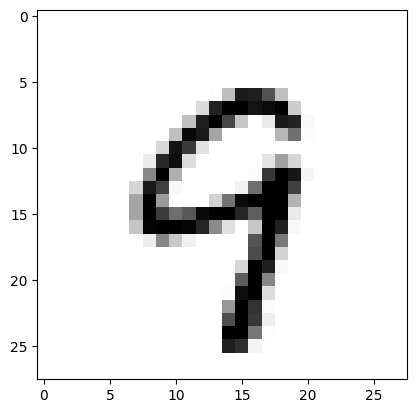

In [34]:
''' 결과 Test '''

with torch.no_grad(): # gradient 계산 없이 빠르게 진행
  
  #1. 전체 test Data 이용 정확도 확인

  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test) # nn.Linear
  correct_prediction = (torch.argmax(prediction, 1) == Y_test )
  accuracy = correct_prediction.float().mean()
  print("Accuracy: {:.4f}%".format( accuracy.item()*100 ), end="\n\n")

  #2. 임의의 1개 data 이용, 예측값 확인해보기
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print("Label: ", Y_single_data.item())
  single_prediction = linear(X_single_data)
  print("Prediction: ", torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28),
             cmap = "Greys", interpolation = "nearest")
  plt.show()